<a href="https://colab.research.google.com/github/CristopherFoster/ML_Centrogeo_CEFV/blob/Tareas/Tarea4_ML_CristopherFoster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 4: Regresión Lineal Regularizada
## Cristopher Foster$_1$, Hugo Carlos Martínez$_2$ y Beatriz Isabel Cruz Sánchez$_3$
#### 1.- Centrogeo, Alumno: al.cfoster@centrogeo.edu.mx. <p> 2.- Centrogeo, Profesor: hcarlos@centrogeo.edu.mx. <p> 3.- Centrogeo, Profesora Ayudante: al.bcruz@centrogeo.edu.mx

### Importamos las librerias a utilizar

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Primero, generamos los datos a utilizar por medio de un aleatorio

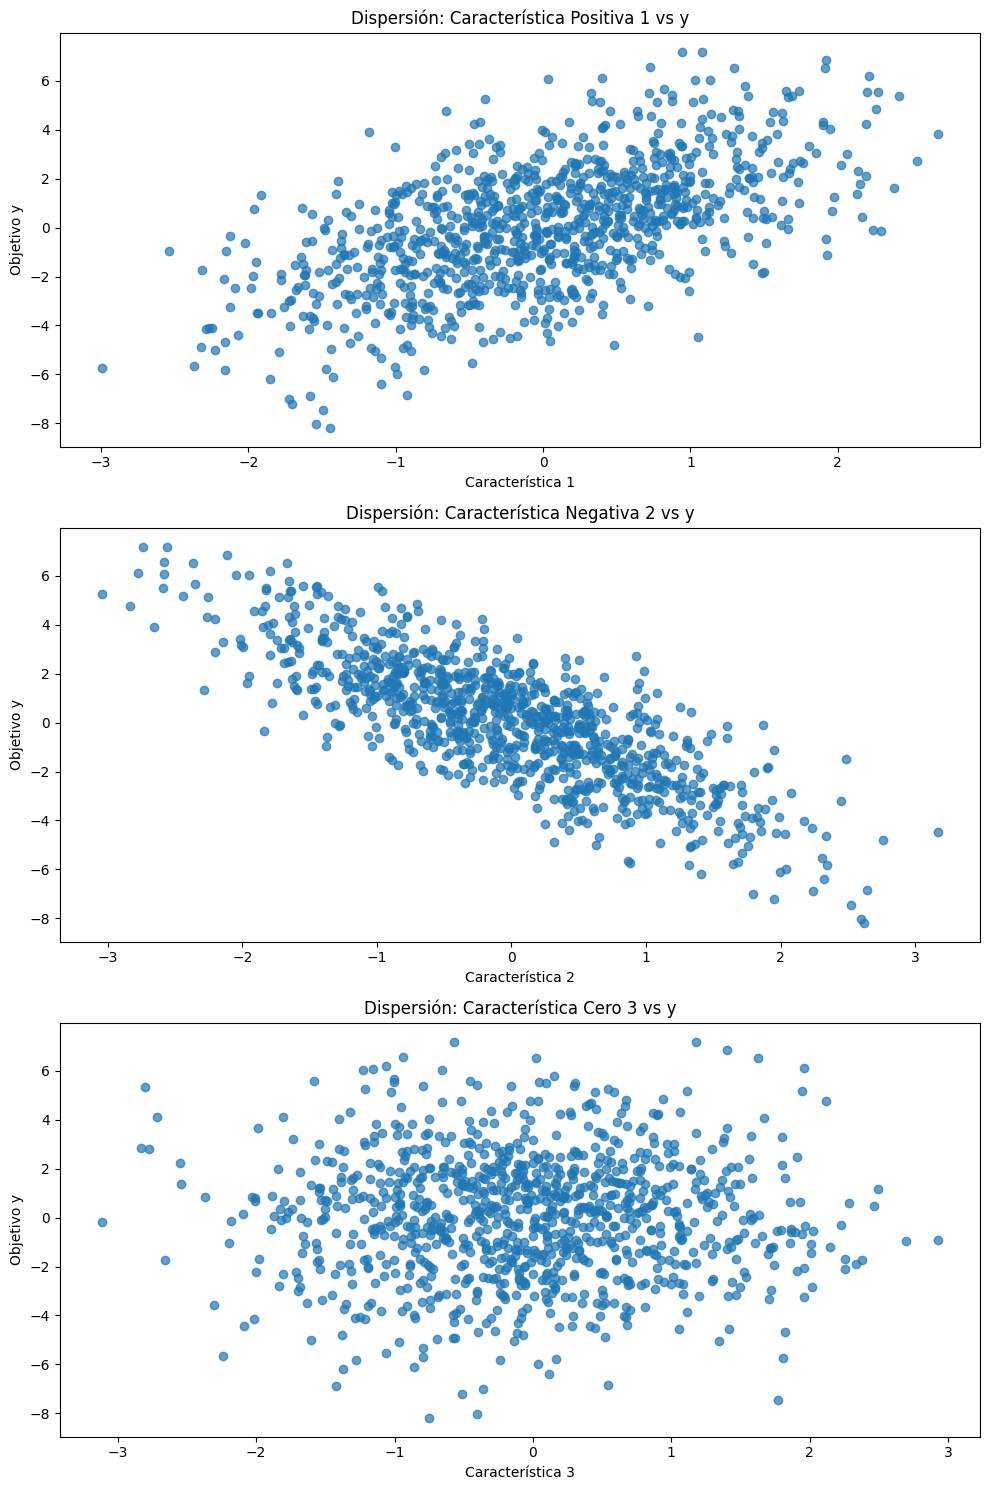

In [24]:
# Generar datos de ejemplo
np.random.seed(0)
M = 1000  # número de muestras
N = 3    # número de características

X = np.random.randn(M, N)
true_w = np.array([1.5, -2.0, 0])
y = X.dot(true_w) + np.random.randn(M) * 0.5
car = ["Positiva","Negativa","Cero"]
# Visualizar los datos generados
def visualize_data(X, y):
    fig, axs = plt.subplots(N, 1, figsize=(10, 15))
    for i in range(N):
        axs[i].scatter(X[:, i], y, alpha=0.7)
        axs[i].set_xlabel(f'Característica {i+1}')
        axs[i].set_ylabel('Objetivo y')
        axs[i].set_title(f'Dispersión: Característica {car[i]} {i+1} vs y')
    plt.tight_layout()
    plt.show()

visualize_data(X, y)

### Calculamos a w y w0 en el estimador

\begin{equation}
    E(w, w_0) = \sum_{i=1}^{M} (y_m - x_m^T w + w_0)^2 + \lambda w^T w
    \end{equation}
    es:
    \begin{equation}
    w_0 = \bar{y}
    \end{equation}
    \begin{equation}
    w = (X^T X + \lambda I)^{-1} X^T y
    \end{equation}
Donde:
- $y_m$: salida esperada para el \(m\)-ésimo ejemplo.
- $x_m$ : vector de características del \(m\)-ésimo ejemplo.
- $w$ : vector de pesos.
- $w_0$ : término de sesgo (inicial).
- $\lambda$ : parámetro de regularización.

Y probamos con distintos valores del estimador lambda


In [31]:
# Función para calcular w y w_0 con el Estimador
def Estimador_regression(X, y, lambda_val):
  #Función que genera a w y w_0 a partir de una base de datos
    M, N = X.shape
    X_b = np.hstack([np.ones((M, 1)), X])  # agregar columna de unos para w_0
    y_mean = np.mean(y)
    w_0 = y_mean
    I = np.eye(N)
    #Definimos la función del "Estimador"
    w = np.linalg.inv(X.T @ X + lambda_val * I) @ X.T @ y
    return w_0, w

# Valores de lambda para probar
lambdas = [-10, 0, 0.1, 1, 10]

# Comparar resultados para diferentes valores de lambda
for lambda_val in lambdas:
    w_0, w = Estimador_regression(X, y, lambda_val)
    print(f"lambda = {lambda_val}: w_0 = {w_0:.2f}, w = {w}")

lambda = -10: w_0 = 0.05, w = [ 1.53322499e+00 -2.01640551e+00 -5.20492090e-04]
lambda = 0: w_0 = 0.05, w = [ 1.51650356e+00 -1.99624671e+00 -5.42107775e-04]
lambda = 0.1: w_0 = 0.05, w = [ 1.51633820e+00 -1.99604715e+00 -5.42316412e-04]
lambda = 1: w_0 = 0.05, w = [ 1.51485150e+00 -1.99425295e+00 -5.44187602e-04]
lambda = 10: w_0 = 0.05, w = [ 1.50014359e+00 -1.97648649e+00 -5.62265158e-04]


### Graficamos la regresión lineal para cada característica, variando a lambda.

Ambas variando como, positiva, cero y negativa.

lambda = 50: w_0 = 0.05, w = [ 1.43809311e+00 -1.90120434e+00 -6.30023680e-04]
lambda = 0: w_0 = 0.05, w = [ 1.51650356e+00 -1.99624671e+00 -5.42107775e-04]
lambda = -400: w_0 = 0.05, w = [ 2.69283969 -3.32446941  0.00417738]


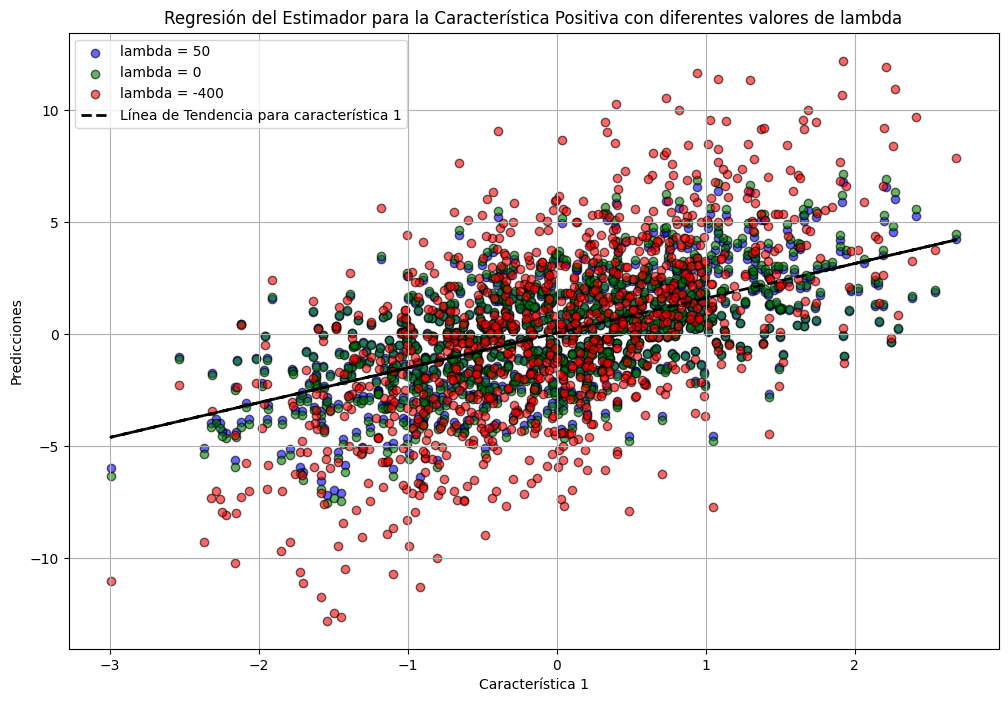

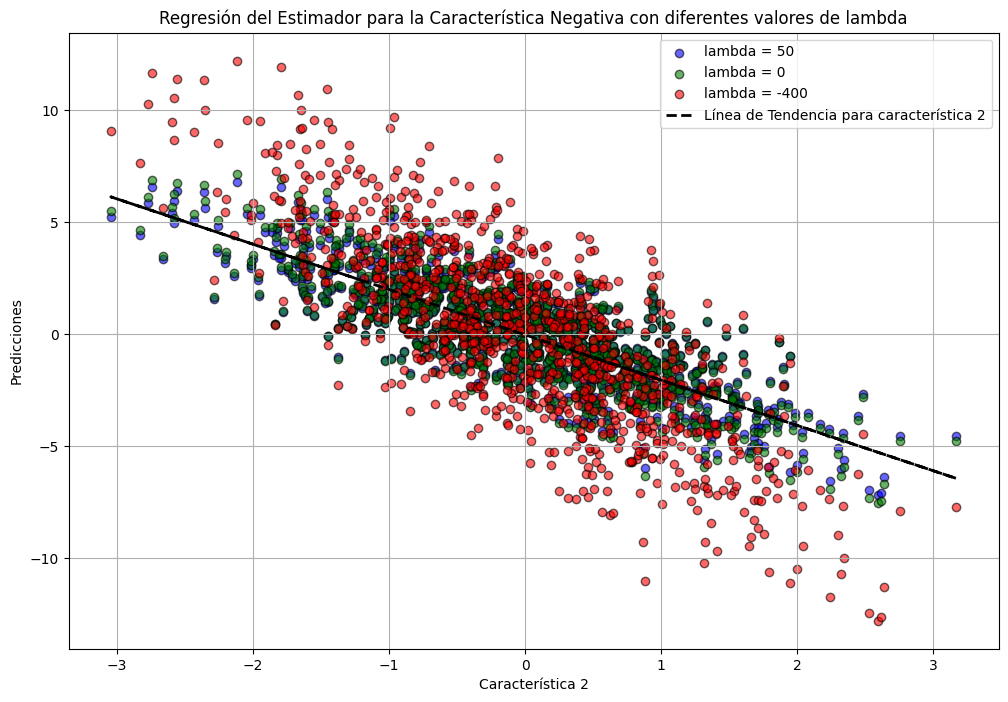

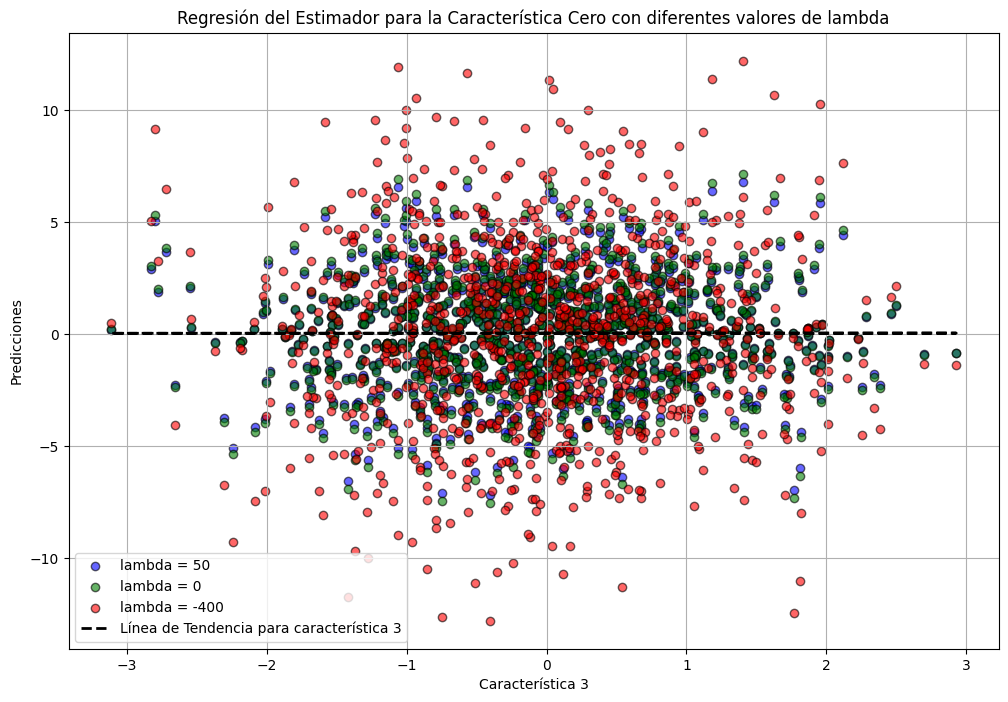

In [60]:
# Valores de lambda para probar
lambdas = [50, 0, -400]

# Comparar resultados para diferentes valores de lambda
for lambda_val in lambdas:
    w_0, w = Estimador_regression(X, y, lambda_val)
    print(f"lambda = {lambda_val}: w_0 = {w_0:.2f}, w = {w}")

# Graficar resultados de predicciones para cada característica
def plot_Estimador_regression_by_feature(X, y, lambdas):
    colors = ['b', 'g', 'r']
    for feature_idx in range(X.shape[1]):
        plt.figure(figsize=(12, 8))
        for i, lambda_val in enumerate(lambdas):
            w_0, w = Estimador_regression(X, y, lambda_val)
            y_pred = X.dot(w)
            plt.scatter(X[:, feature_idx], y_pred, color=colors[i], alpha=0.6, edgecolors='k', label=f'lambda = {lambda_val}')

        # Ajustar una línea de tendencia para cada característica
        reg = LinearRegression()
        X_feature = X[:, feature_idx].reshape(-1, 1)
        reg.fit(X_feature, y)
        y_trend = reg.predict(X_feature)

        plt.plot(X[:, feature_idx], y_trend, 'k--', lw=2, label=f'Línea de Tendencia para característica {feature_idx + 1}')

        plt.xlabel(f'Característica {feature_idx + 1}')
        plt.ylabel('Predicciones')
        plt.legend()
        plt.title(f'Regresión del Estimador para la Característica {car[feature_idx]} con diferentes valores de lambda')
        plt.grid(True)
        plt.show()

# Graficar los resultados de las predicciones para cada característica
plot_Estimador_regression_by_feature(X, y, lambdas)